# Problem Statement

What is a competitive salary range for a full-time data scientist, and is there a difference in salary between U.S. and non-U.S. positions?

## Alternative ways to ask the question 

How does full-time data scientist salary vary by experience level and location?

How does full-time data scientist salary vary by company size and location?


# Load and Prepare the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
# open and read file 
infile = "/Users/evebarr20/Documents/DSE_5002/Project1/project_1_data.csv"
ds_df = pd.read_csv(infile, index_col = 'Unnamed: 0')
ds_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
# shape of the data set
ds_df.shape

(607, 11)

In [4]:
# data types
ds_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [5]:
# convert appropriate variables to type Categorical 
ds_df['work_year'] = pd.Categorical(ds_df.work_year)
ds_df['experience_level'] = pd.Categorical(ds_df.experience_level)
ds_df['employment_type'] = pd.Categorical(ds_df.employment_type)
ds_df['job_title'] = pd.Categorical(ds_df.job_title)
ds_df['salary_currency'] = pd.Categorical(ds_df.salary_currency)
ds_df['employee_residence'] = pd.Categorical(ds_df.employee_residence)
ds_df['remote_ratio'] = pd.Categorical(ds_df.remote_ratio)
ds_df['company_location'] = pd.Categorical(ds_df.company_location)
ds_df['company_size'] = pd.Categorical(ds_df.company_size)

ds_df.dtypes

work_year             category
experience_level      category
employment_type       category
job_title             category
salary                   int64
salary_currency       category
salary_in_usd            int64
employee_residence    category
remote_ratio          category
company_location      category
company_size          category
dtype: object

In [6]:
# check for missing values 
missing_counts = ds_df.isnull().sum()
print(missing_counts)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


# Exploratory Data Analysis

## Summary

In [7]:
# statistic summary for numeric columns
ds_df.describe()

,salary,salary_in_usd
count,6.070000e+02,607.000000
mean,3.240001e+05,112297.869852
std,1.544357e+06,70957.259411
min,4.000000e+03,2859.000000
25%,7.000000e+04,62726.000000
50%,1.150000e+05,101570.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


*In the salary column, the mean is larger than the median, indicating right skew. Also, the standard deviation is high, indicating a substantial difference between values, which makes sense because the salary variable mixes many currencies, thereby inflating the range. Raw salaries would not be ideal for cross-country comparisons.*

*In the salary_in_usd column, the mean is larger than the median, indicating right-skewness, but the mean and median are closer together than in the salary variable. The quartiles form a reasonable salary band, and the max is high but not absurdly higher relative to the mean, unlike the salary variable. Converting to USD reduces distortion and better represents actual pay differences, making it appropriate for comparison and recommendations.*

In [8]:
# Get the list of unique years
ds_df['work_year'].unique()

[2020, 2021, 2022]
Categories (3, int64): [2020, 2021, 2022]

In [9]:
# Count of each unique year
ds_df['work_year'].value_counts(normalize=True)

work_year
2022    0.523888
2021    0.357496
2020    0.118616
Name: proportion, dtype: float64

*There are three unique work years in the dataset, with approximately 52% of observations occurring in 2022.*

In [10]:
# Get the list of unique experience_level
ds_df['experience_level'].unique()

['MI', 'SE', 'EN', 'EX']
Categories (4, object): ['EN', 'EX', 'MI', 'SE']

In [11]:
# Count of each unique experience_level
ds_df['experience_level'].value_counts(normalize=True)

experience_level
SE    0.461285
MI    0.350906
EN    0.144975
EX    0.042834
Name: proportion, dtype: float64

*There are four unique experience levels in the dataset, with the majority of observations falling into intermediate/senior and junior/mid levels. Significantly fewer observations fall into the expert executive-level/director category.*

In [12]:
# Get the list of unique employment_type
ds_df['employment_type'].unique()

['FT', 'CT', 'PT', 'FL']
Categories (4, object): ['CT', 'FL', 'FT', 'PT']

In [13]:
# Count of each unique employment_type
ds_df['employment_type'].value_counts(normalize=True)

employment_type
FT    0.968699
PT    0.016474
CT    0.008237
FL    0.006590
Name: proportion, dtype: float64

*There are four unique employment types in the dataset; a large proportion of observations falls into the full-time category (approximately 96%), and the remaining 4% fall into the other categories.*

In [14]:
# Get the list of unique job_title
ds_df['job_title'].unique()

['Data Scientist', 'Machine Learning Scientist', 'Big Data Engineer', 'Product Data Analyst', 'Machine Learning Engineer', ..., 'ETL Developer', 'Head of Machine Learning', 'NLP Engineer', 'Lead Machine Learning Engineer', 'Data Analytics Lead']
Length: 50
Categories (50, object): ['3D Computer Vision Researcher', 'AI Scientist', 'Analytics Engineer', 'Applied Data Scientist', ..., 'Principal Data Scientist', 'Product Data Analyst', 'Research Scientist', 'Staff Data Scientist']

In [15]:
# Count of each unique job_title
ds_df['job_title'].value_counts(normalize=True)

job_title
Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Big Data Engineer                           0.013180
Machine Learning Scientist                  0.013180
Director of Data Science                    0.011532
AI Scientist                                0.011532
Principal Data Scientist                    0.011532
Data Science Consultant                     0.011532
Data Analytics Manager                      0.011532
Computer Vision Engineer                    0.009885
BI Data Analyst                             0.009885
ML Engineer                                 0.009885
Lead Data Engineer                          0.009885
Data Engineering Manager            

*There are fifty unique job titles in the dataset. The range across the categories is relatively balanced. The most common job title is data scientist at about 23%, and the least common job title is staff data scientist at 0.16%*

In [16]:
# Get the list of unique Salary currency
ds_df['salary_currency'].unique()

['EUR', 'USD', 'GBP', 'HUF', 'INR', ..., 'CLP', 'BRL', 'TRY', 'AUD', 'CHF']
Length: 17
Categories (17, object): ['AUD', 'BRL', 'CAD', 'CHF', ..., 'PLN', 'SGD', 'TRY', 'USD']

In [17]:
# Count of each unique Salary currency
ds_df['salary_currency'].value_counts(normalize=True)

salary_currency
USD    0.655684
EUR    0.156507
GBP    0.072488
INR    0.044481
CAD    0.029654
JPY    0.004942
PLN    0.004942
TRY    0.004942
CNY    0.003295
DKK    0.003295
BRL    0.003295
HUF    0.003295
MXN    0.003295
SGD    0.003295
AUD    0.003295
CHF    0.001647
CLP    0.001647
Name: proportion, dtype: float64

*There are seventeen unique salary currencies in the dataset, with approximately 65% of observations occurring in the United States and 15% in Europe.*

In [18]:
# Get the list of unique employee residence
ds_df['employee_residence'].unique()

['DE', 'JP', 'GB', 'HN', 'US', ..., 'EE', 'AU', 'BO', 'IE', 'CH']
Length: 57
Categories (57, object): ['AE', 'AR', 'AT', 'AU', ..., 'TR', 'UA', 'US', 'VN']

In [19]:
# Count of each unique employee residence
ds_df['employee_residence'].value_counts(normalize=True)

employee_residence
US    0.546952
GB    0.072488
IN    0.049423
CA    0.047776
DE    0.041186
FR    0.029654
ES    0.024712
GR    0.021417
JP    0.011532
PK    0.009885
BR    0.009885
PT    0.009885
NL    0.008237
IT    0.006590
PL    0.006590
RU    0.006590
TR    0.004942
AE    0.004942
VN    0.004942
AT    0.004942
AU    0.004942
BE    0.003295
SI    0.003295
MX    0.003295
RO    0.003295
SG    0.003295
NG    0.003295
HU    0.003295
DK    0.003295
TN    0.001647
CL    0.001647
RS    0.001647
UA    0.001647
BG    0.001647
PR    0.001647
BO    0.001647
CH    0.001647
PH    0.001647
NZ    0.001647
EE    0.001647
MY    0.001647
DZ    0.001647
MT    0.001647
MD    0.001647
LU    0.001647
KE    0.001647
CN    0.001647
JE    0.001647
CO    0.001647
IR    0.001647
AR    0.001647
CZ    0.001647
IE    0.001647
HR    0.001647
HN    0.001647
HK    0.001647
IQ    0.001647
Name: proportion, dtype: float64

*There are fifty-seven unique employee residences in the dataset, with the majority of employees living in the United States, approximately 54%*

In [20]:
# Get the list of unique remote ratio
ds_df['remote_ratio'].unique()

[0, 50, 100]
Categories (3, int64): [0, 50, 100]

In [21]:
# Count of each unique remote ratio
ds_df['remote_ratio'].value_counts(normalize=True)

remote_ratio
100    0.627677
0      0.209226
50     0.163097
Name: proportion, dtype: float64

*There are three unique remote ratios in the dataset. The range across the categories is relatively balanced, and a large proportion of employees get more than 80% of their work done remotely.*

In [22]:
# Get the list of unique company location
ds_df['company_location'].unique()

['DE', 'JP', 'GB', 'HN', 'US', ..., 'DZ', 'EE', 'MY', 'AU', 'IE']
Length: 50
Categories (50, object): ['AE', 'AS', 'AT', 'AU', ..., 'TR', 'UA', 'US', 'VN']

In [23]:
# Count of each unique company location
ds_df['company_location'].value_counts(normalize=True)

company_location
US    0.584843
GB    0.077430
CA    0.049423
DE    0.046129
IN    0.039539
FR    0.024712
ES    0.023064
GR    0.018122
JP    0.009885
PL    0.006590
PT    0.006590
NL    0.006590
AT    0.006590
MX    0.004942
LU    0.004942
TR    0.004942
PK    0.004942
AE    0.004942
AU    0.004942
BR    0.004942
DK    0.004942
CN    0.003295
CZ    0.003295
BE    0.003295
SI    0.003295
RU    0.003295
NG    0.003295
IT    0.003295
CH    0.003295
NZ    0.001647
CL    0.001647
EE    0.001647
SG    0.001647
UA    0.001647
RO    0.001647
CO    0.001647
MY    0.001647
DZ    0.001647
MT    0.001647
MD    0.001647
KE    0.001647
IR    0.001647
IQ    0.001647
AS    0.001647
IL    0.001647
IE    0.001647
HU    0.001647
HR    0.001647
HN    0.001647
VN    0.001647
Name: proportion, dtype: float64

*There are fifty unique company locations in the dataset, with the majority of companies located in the United States at about 58%.*

In [24]:
# Get the list of unique company size
ds_df['company_size'].unique()

['L', 'S', 'M']
Categories (3, object): ['L', 'M', 'S']

In [25]:
# Count of each unique company size
ds_df['company_size'].value_counts(normalize=True)

company_size
M    0.537068
L    0.326194
S    0.136738
Name: proportion, dtype: float64

*There are three distinct company sizes in the dataset, with the majority of observations falling into the medium and large categories. Significantly fewer observations fall into the small category.*

## Plots

In [26]:
# filter job tiles 
filter_jt = ds_df.copy()
filter_jt = filter_jt[filter_jt['job_title'].str.contains('Data Scientist')]
filter_jt["job_title"] = filter_jt["job_title"].cat.remove_unused_categories()
avg_salary =(filter_jt
    .groupby(["work_year", "job_title"],observed=True)["salary_in_usd"]
    .mean()
    .reset_index()
             )

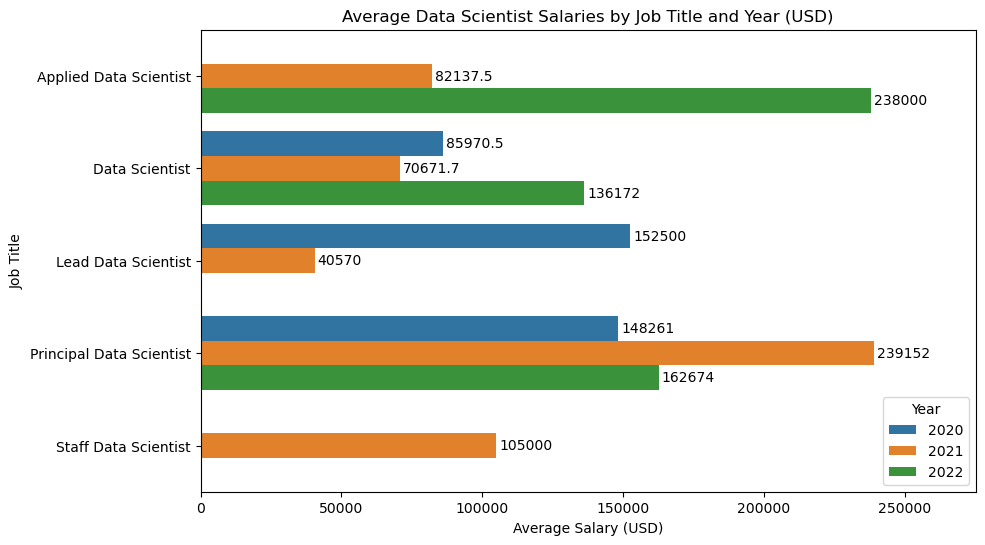

In [27]:
# Barplot to show work_year, job_title, and salary_in_usd
# make plot wider
plt.figure(figsize = (10, 6))
ax = sns.barplot(
    data = avg_salary,
    x = "salary_in_usd",
    y = "job_title",
    hue = "work_year", 
    orient = "y",
    estimator="sum", errorbar=None)

# text labels with each bar value
for container in ax.containers:
    ax.bar_label(container, fontsize = 10, padding = 2)

# adds about 15% extra space on the right so text labels don't cut off
ax.margins(x = 0.15)

# add labels 
plt.title("Average Data Scientist Salaries by Job Title and Year (USD)")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Job Title")
plt.legend(title = "Year")



*Average salaries vary by both job title and year. Applied Data Scientist shows the highest average in 2022, while Principal Data Scientist has the highest average in 2021. Some roles increase over time while others decrease, showing that salary trends are not consistent across job titles.*

Text(0, 0.5, 'Count')

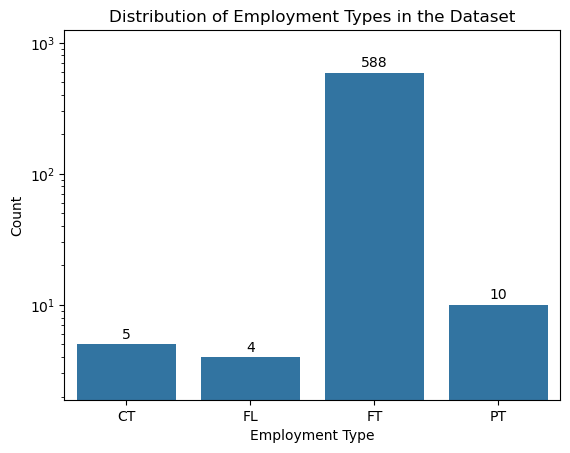

In [28]:
# bar plot for employment_type
ax = sns.countplot(ds_df, x = "employment_type")
ax.set_yscale("log")

# text labels
for container in ax.containers:
    ax.bar_label(container, fontsize = 10, padding = 2)

# adds about 15% extra space on the top so text labels don't cut off
ax.margins(y = 0.15)

# add labels 
plt.title("Distribution of Employment Types in the Dataset")
plt.xlabel("Employment Type")
plt.ylabel("Count")

*FT(Full-time) positions dominate the dataset, while PT(Part-time), CT(Contract), and FL(Freelance) roles are relatively rare*

Text(0, 0.5, 'Experience Level')

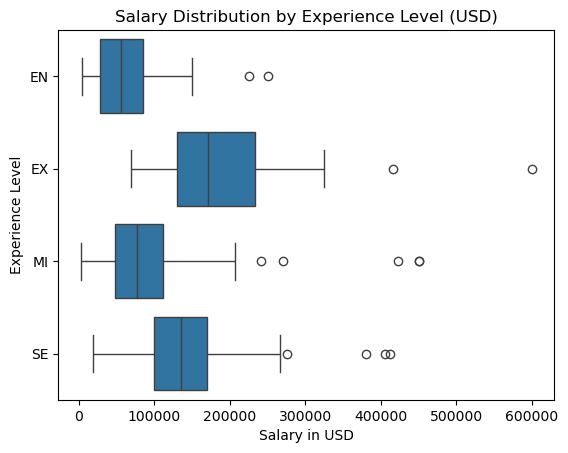

In [30]:
#box plot salary_USD with experience_level
sns.boxplot(ds_df, x = 'salary_in_usd', y = 'experience_level')

# add labels 
plt.title("Salary Distribution by Experience Level (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Experience Level")

*This boxplot shows that expert-level roles have the highest median salary and the highest extreme high-salary outliers. Entry-level positions have the lowest median salaries. Across all experience levels, the salary distributions are right-skewed, indicating the presence of higher-end outliers. Overall, the plot suggests a clear positive relationship between experience level and salary, with higher experience associated with higher pay.*

Text(0, 0.5, 'Company size')

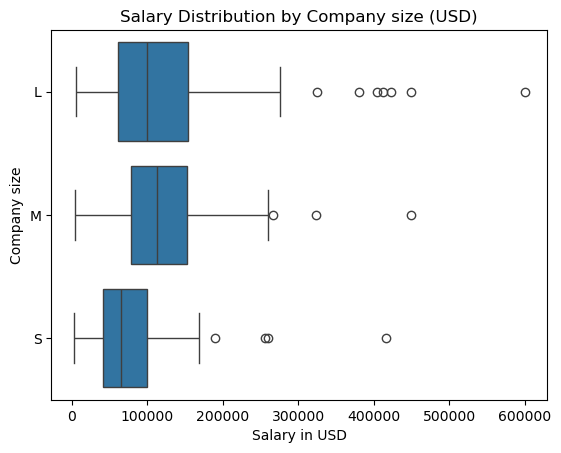

In [31]:
#box plot salary_USD with company size
sns.boxplot(ds_df, x = 'salary_in_usd', y = 'company_size')

# add labels 
plt.title("Salary Distribution by Company size (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Company size")

*This boxplot shows that medium-sized companies have a slightly higher median salary than large companies. Small companies have the lowest median salaries and the narrowest distribution. All company sizes display right-skewed salary distributions, with larger companies showing more extreme high-salary outliers. Overall, company size appears to influence salary levels.*

Text(0, 0.5, 'Remote Ratio')

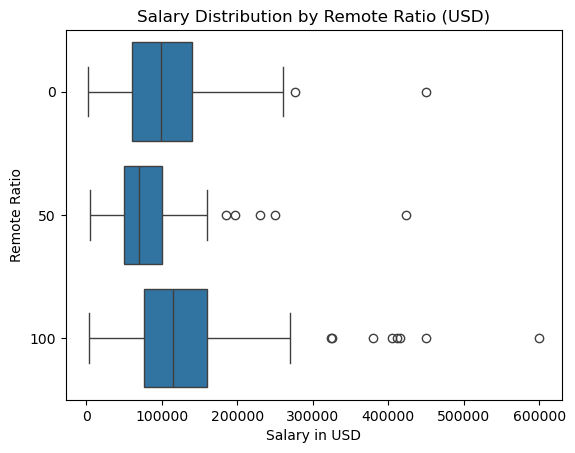

In [53]:
#box plot salary_USD with remote ratio
sns.boxplot(ds_df, x = 'salary_in_usd', y = 'remote_ratio')

# add labels 
plt.title("Salary Distribution by Remote Ratio (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Remote Ratio")

*This boxplot shows that fully remote roles (100%) have the highest median salary, followed by on-site roles (0%), while hybrid roles (50%) have the lowest median salary. All three remote categories exhibit right-skewed salary distributions. Fully remote positions exhibit the greatest variability and the most extreme high-end outliers.*

Text(0, 0.5, 'Employee Residence Group')

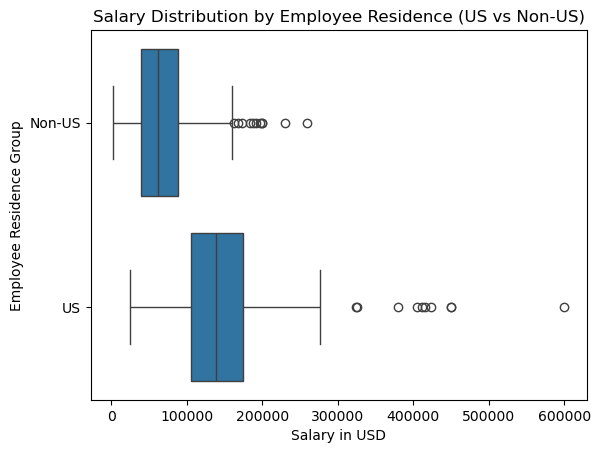

In [54]:
# Barplot to show Salary USD, company_location, employee_residence 
# separate US salaries and NonUS Salaries
loc_df = ds_df.copy()

loc_df["residence_group"] = np.where(
    loc_df["employee_residence"] == "US",
    "US",
    "Non-US"
)

#boxplot us vs non_us employee residence

sns.boxplot(data=loc_df, x="salary_in_usd", y="residence_group")
plt.title("Salary Distribution by Employee Residence (US vs Non-US)")
plt.xlabel("Salary in USD")
plt.ylabel("Employee Residence Group")

*US-based employees have higher median salaries and more extreme high-end outliers than employees residing outside the US. The salary distribution among US employees is also wider, indicating greater compensation variability. Overall, this suggests that employees living in the US tend to earn higher salaries than those living in non-US locations*